In [12]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn
import gc
import seaborn as sns 
import scipy as sp

In [13]:
train_transaction = pd.read_csv("E:/projects/PROJECTS/ieee_fraud_detection/ieee-fraud-detection/train_transaction.csv")
train_identity = pd.read_csv("E:/projects/PROJECTS/ieee_fraud_detection/ieee-fraud-detection/train_identity.csv")
test_transaction = pd.read_csv("E:/projects/PROJECTS/ieee_fraud_detection/ieee-fraud-detection/test_transaction.csv")
test_identity = pd.read_csv("E:/projects/PROJECTS/ieee_fraud_detection/ieee-fraud-detection/test_identity.csv")


In [14]:
print(train_transaction.shape)
print(train_identity.shape)

(590540, 394)
(144233, 41)


In [15]:
print(train_transaction.shape)
print(train_identity.shape)

(590540, 394)
(144233, 41)


 Merging the data on TransactionID

In [16]:
train = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')

In [17]:
del train_identity, train_transaction

In [18]:
train.shape

(590540, 434)

In [19]:
test = pd.merge(test_transaction, test_identity, on='TransactionID', how='left')

In [20]:
del test_identity, test_transaction

In [21]:
test.shape

(506691, 433)

Checking if there is any feature columns available in train but not in test

In [22]:
different_features = [features for features in train.columns if features not in test.columns]

In [23]:
different_features 

['isFraud',
 'id_01',
 'id_02',
 'id_03',
 'id_04',
 'id_05',
 'id_06',
 'id_07',
 'id_08',
 'id_09',
 'id_10',
 'id_11',
 'id_12',
 'id_13',
 'id_14',
 'id_15',
 'id_16',
 'id_17',
 'id_18',
 'id_19',
 'id_20',
 'id_21',
 'id_22',
 'id_23',
 'id_24',
 'id_25',
 'id_26',
 'id_27',
 'id_28',
 'id_29',
 'id_30',
 'id_31',
 'id_32',
 'id_33',
 'id_34',
 'id_35',
 'id_36',
 'id_37',
 'id_38']

The features are available in both dataset but under different name, so they need to be renamed, except isFraud as it is the target value 

In [24]:
test = test.rename(columns={"id-01": "id_01", "id-02": "id_02", "id-03": "id_03", 
                            "id-06": "id_06", "id-05": "id_05", "id-04": "id_04", 
                            "id-07": "id_07", "id-08": "id_08", "id-09": "id_09", 
                            "id-10": "id_10", "id-11": "id_11", "id-12": "id_12", 
                            "id-15": "id_15", "id-14": "id_14", "id-13": "id_13", 
                            "id-16": "id_16", "id-17": "id_17", "id-18": "id_18", 
                            "id-21": "id_21", "id-20": "id_20", "id-19": "id_19", 
                            "id-22": "id_22", "id-23": "id_23", "id-24": "id_24", 
                            "id-27": "id_27", "id-26": "id_26", "id-25": "id_25", 
                            "id-28": "id_28", "id-29": "id_29", "id-30": "id_30", 
                            "id-31": "id_31", "id-32": "id_32", "id-33": "id_33", 
                            "id-34": "id_34", "id-35": "id_35", "id-36": "id_36", 
                            "id-37": "id_37", "id-38": "id_38"})

In [25]:
pd. set_option("display.max_columns", None)
pd. set_option("display.max_rows", None)
gc.collect()

240

In [26]:
test.head()

TransactionID  TransactionDT  TransactionAmt ProductCD  card1  card2  \
0        3663549       18403224           31.95         W  10409  111.0   
1        3663550       18403263           49.00         W   4272  111.0   
2        3663551       18403310          171.00         W   4476  574.0   
3        3663552       18403310          284.95         W  10989  360.0   
4        3663553       18403317           67.95         W  18018  452.0   

   card3       card4  card5  card6  addr1  addr2   dist1  dist2 P_emaildomain  \
0  150.0        visa  226.0  debit  170.0   87.0     1.0    NaN     gmail.com   
1  150.0        visa  226.0  debit  299.0   87.0     4.0    NaN       aol.com   
2  150.0        visa  226.0  debit  472.0   87.0  2635.0    NaN   hotmail.com   
3  150.0        visa  166.0  debit  205.0   87.0    17.0    NaN     gmail.com   
4  150.0  mastercard  117.0  debit  264.0   87.0     6.0    NaN     gmail.com   

  R_emaildomain   C1   C2   C3   C4   C5   C6   C7   C8   C9  C10  C11  C12  \
0           NaN  6.0  6.0  0.0  0.0  3.0  4.0  0.0  0.0  6.0  0.0  5.0  1.0   
1           NaN  3.0  2.0  0.0  0.0  0.0  1.0  0.0  0.0  2.0  0.0  1.0  1.0   
2           NaN  2.0  2.0  0.0  0.0  0.0  5.0  0.0  0.0  4.0  0.0  2.0  0.0   
3           NaN  5.0  2.0  0.0  0.0  1.0  1.0  0.0  0.0  2.0  0.0  2.0  0.0   
4           NaN  6.0  6.0  0.0  0.0  2.0  5.0  0.0  0.0  5.0  0.0  6.0  0.0   

     C13  C14     D1     D2    D3     D4    D5  D6  D7  D8  D9    D10    D11  \
0  115.0  6.0  419.0  419.0  27.0  398.0  27.0 NaN NaN NaN NaN  418.0  203.0   
1   12.0  2.0  149.0  149.0   7.0  634.0   7.0 NaN NaN NaN NaN  231.0  634.0   
2   22.0  2.0  137.0  137.0  10.0   97.0  10.0 NaN NaN NaN NaN  136.0  136.0   
3    7.0  4.0   42.0   42.0  41.0  242.0  41.0 NaN NaN NaN NaN  242.0  242.0   
4   14.0  6.0   22.0   22.0   0.0   22.0   0.0 NaN NaN NaN NaN   22.0   22.0   

   D12  D13  D14    D15 M1 M2 M3   M4   M5 M6   M7   M8   M9   V1   V2   V3  \
0  NaN  NaN  NaN  409.0  T  T  F  NaN  NaN  F    T    T    T  1.0  1.0  1.0   
1  NaN  NaN  NaN  634.0  T  F  F   M0  NaN  F  NaN  NaN  NaN  1.0  1.0  1.0   
2  NaN  NaN  NaN   97.0  T  T  F   M0    F  F    F    F    F  1.0  1.0  1.0   
3  NaN  NaN  NaN  242.0  T  T  T  NaN  NaN  T  NaN  NaN  NaN  1.0  1.0  1.0   
4  NaN  NaN  NaN   22.0  T  T  T  NaN  NaN  F    F    T    T  1.0  1.0  1.0   

    V4   V5   V6   V7   V8   V9  V10  V11  V12  V13  V14  V15  V16  V17  V18  \
0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
1  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
2  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
3  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
4  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   

   V19  V20  V21  V22  V23  V24  V25  V26  V27  V28  V29  V30  V31  V32  V33  \
0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  1.0  1.0  0.0  0.0  2.0  2.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0   
4  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0   

   V34  V35  V36  V37  V38  V39  V40  V41  V42  V43  V44  V45  V46  V47  V48  \
0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0   
1  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0   
2  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0   
3  0.0  2.0  2.0  2.0  2.0  0.0  0.0  1.0  0.0  0.0  2.0  2.0  2.0  2.0  1.0   
4  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0   

   V49  V50  V51  V52  V53  V54  V55  V56  V57  V58  V59  V60  V61  V62  V63  \
0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0

In [27]:
train.head()

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5   card6  addr1  addr2  dist1  dist2  \
0    NaN  150.0    discover  142.0  credit  315.0   87.0   19.0    NaN   
1  404.0  150.0  mastercard  102.0  credit  325.0   87.0    NaN    NaN   
2  490.0  150.0        visa  166.0   debit  330.0   87.0  287.0    NaN   
3  567.0  150.0  mastercard  117.0   debit  476.0   87.0    NaN    NaN   
4  514.0  150.0  mastercard  102.0  credit  420.0   87.0    NaN    NaN   

  P_emaildomain R_emaildomain   C1   C2   C3   C4   C5   C6   C7   C8   C9  \
0           NaN           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
1     gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
2   outlook.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
3     yahoo.com           NaN  2.0  5.0  0.0  0.0  0.0  4.0  0.0  0.0  1.0   
4     gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   

   C10  C11  C12   C13  C14     D1     D2    D3    D4   D5  D6  D7  D8  D9  \
0  0.0  2.0  0.0   1.0  1.0   14.0    NaN  13.0   NaN  NaN NaN NaN NaN NaN   
1  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN NaN NaN NaN   
2  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN NaN NaN NaN   
3  0.0  1.0  0.0  25.0  1.0  112.0  112.0   0.0  94.0  0.0 NaN NaN NaN NaN   
4  1.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   NaN  NaN NaN NaN NaN NaN   

    D10    D11  D12  D13  D14    D15   M1   M2   M3   M4   M5   M6   M7   M8  \
0  13.0   13.0  NaN  NaN  NaN    0.0    T    T    T   M2    F    T  NaN  NaN   
1   0.0    NaN  NaN  NaN  NaN    0.0  NaN  NaN  NaN   M0    T    T  NaN  NaN   
2   0.0  315.0  NaN  NaN  NaN  315.0    T    T    T   M0    F    F    F    F   
3  84.0    NaN  NaN  NaN  NaN  111.0  NaN  NaN  NaN   M0    T    F  NaN  NaN   
4   NaN    NaN  NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

    M9   V1   V2   V3   V4   V5   V6   V7   V8   V9  V10  V11  V12  V13  V14  \
0  NaN  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  0.0  1.0   
2    F  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  1.0  1.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V15  V16  V17  V18  V19  V20  V21  V22  V23  V24  V25  V26  V27  V28  V29  \
0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V30  V31  V32  V33  V34  V35  V36  V37  V38  V39  V40  V41  V42  V43  V44  \
0  0.0  0.0  0.0  0.0  0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0   
2  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0   
3  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V45  V46  V47  V48  V49  V50  V51  V52  V53  V54  V55  V56  V57  V58  V59  \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
1  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  

### Missing Values 

There are a few rows that does not have missing values, missing value ranges from(1 to 99)%. 

In [28]:
features_with_na=[features for features in train.columns if train[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values
most_frequent_missing = []
for feature in features_with_na:
    print(feature, np.round(train[feature].isnull().mean(), 4),  ' % missing values')
gc.collect()

card2 0.0151  % missing values
card3 0.0027  % missing values
card4 0.0027  % missing values
card5 0.0072  % missing values
card6 0.0027  % missing values
addr1 0.1113  % missing values
addr2 0.1113  % missing values
dist1 0.5965  % missing values
dist2 0.9363  % missing values
P_emaildomain 0.1599  % missing values
R_emaildomain 0.7675  % missing values
D1 0.0021  % missing values
D2 0.4755  % missing values
D3 0.4451  % missing values
D4 0.286  % missing values
D5 0.5247  % missing values
D6 0.8761  % missing values
D7 0.9341  % missing values
D8 0.8731  % missing values
D9 0.8731  % missing values
D10 0.1287  % missing values
D11 0.4729  % missing values
D12 0.8904  % missing values
D13 0.8951  % missing values
D14 0.8947  % missing values
D15 0.1509  % missing values
M1 0.4591  % missing values
M2 0.4591  % missing values
M3 0.4591  % missing values
M4 0.4766  % missing values
M5 0.5935  % missing values
M6 0.2868  % missing values
M7 0.5864  % missing values
M8 0.5863  % missing v

0

As there are many features that are with similar prefix , the best way is to approach with the similar name and try to figure out the correlation between the features 

### The target column here is - isFraud

Here, its an imbalance dataset, as we can see fraud value 1 is far more less than the non fraud value 0.  

<AxesSubplot:>

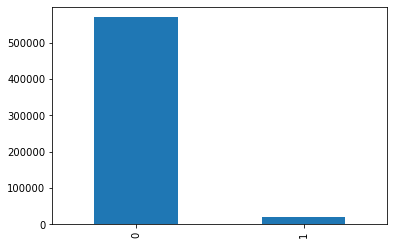

In [29]:
train['isFraud'].value_counts().plot.bar()

# Similar Prefix Featues 

In [30]:
Transaction_features = [features for features in train.columns if 'Transaction' in features] 

In [31]:
Transaction_features 

['TransactionID', 'TransactionDT', 'TransactionAmt']

### TransactionDT

does not have any connection among the distribution of time line

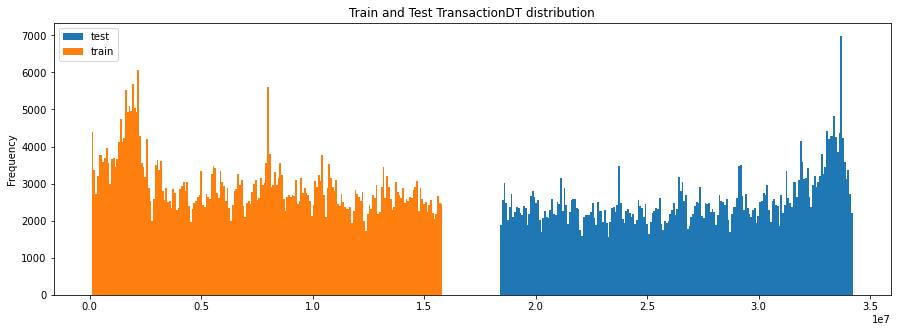

In [32]:
test['TransactionDT'].plot(kind='hist', figsize=(15, 5), label='test', bins=200, title='Train and Test TransactionDT distribution')
train['TransactionDT'].plot(kind='hist', label='train', bins=200)
plt.legend()
plt.show()

### TransactionAmt

<AxesSubplot:title={'center':' Test TransactionAmt distribution'}, ylabel='Frequency'>

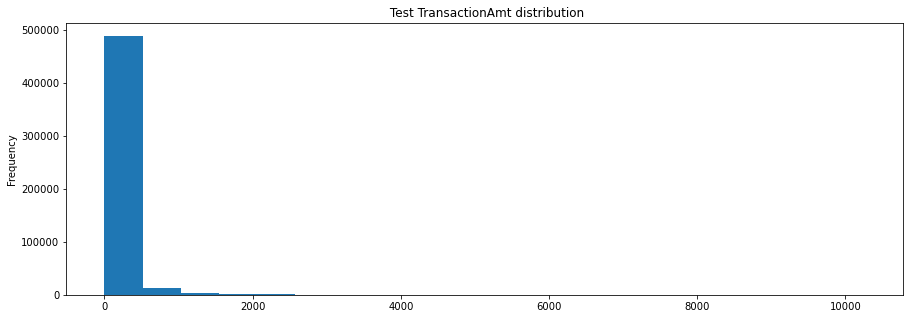

In [33]:
test['TransactionAmt'].plot(kind='hist', figsize=(15, 5), label='test', bins=20, title=' Test TransactionAmt distribution')


<AxesSubplot:title={'center':'Train TransactionAmt distribution'}, ylabel='Frequency'>

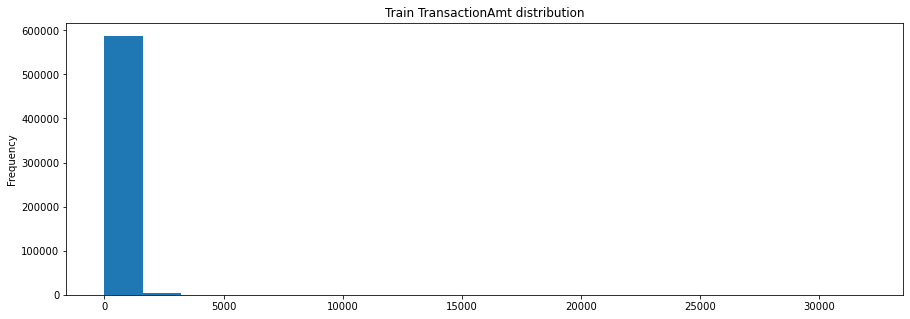

In [34]:
train['TransactionAmt'].plot(kind='hist', figsize=(15, 5), label='test', bins=20, title='Train TransactionAmt distribution')

<AxesSubplot:>

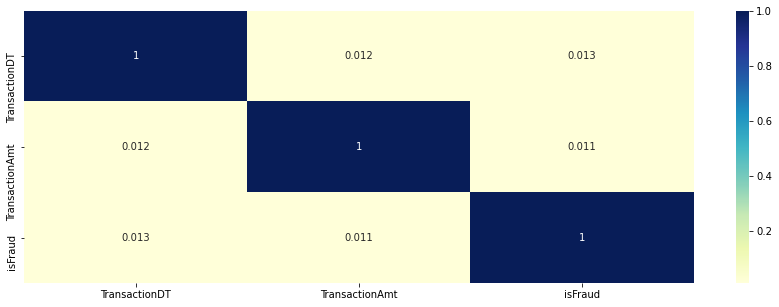

In [35]:
correlation_Transaction_features = ['TransactionDT', 'TransactionAmt','isFraud']
ccorrelation_Transaction = train[correlation_Transaction_features].corr()
plt.subplots(figsize = (15, 5))
sns.heatmap(ccorrelation_Transaction,annot=True, cmap = 'YlGnBu') 


### Card features

In [36]:
card_features = [features for features in train.columns if 'card' in features] 

In [37]:
card_features

['card1', 'card2', 'card3', 'card4', 'card5', 'card6']

total number of categories in this card1 13553 


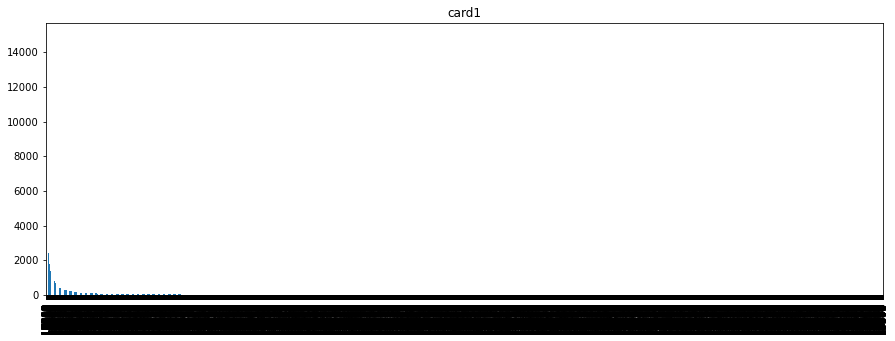

total number of categories in this card2 500 


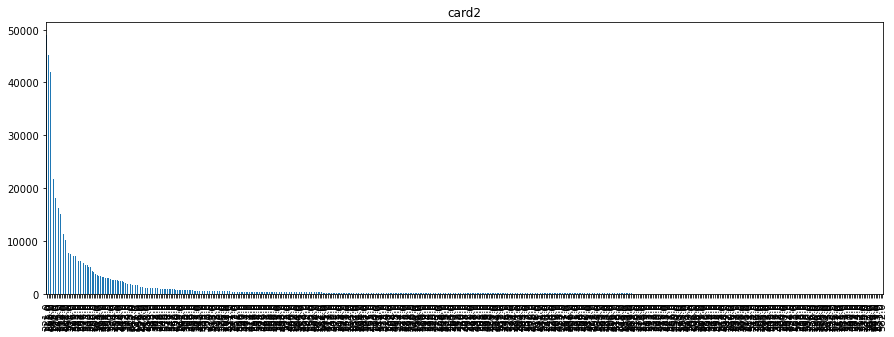

total number of categories in this card3 114 


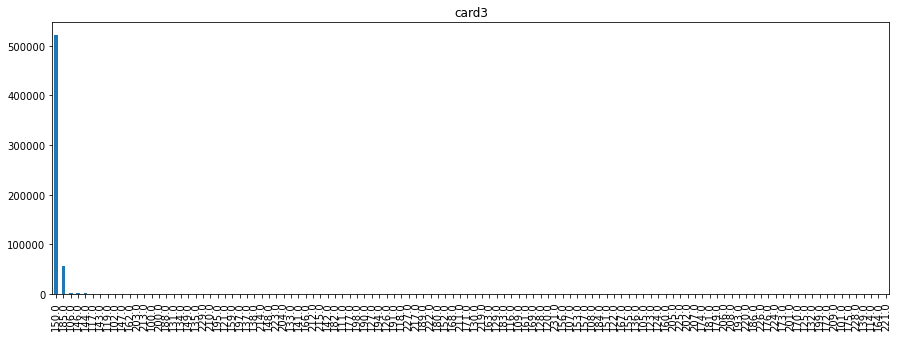

total number of categories in this card4 4 


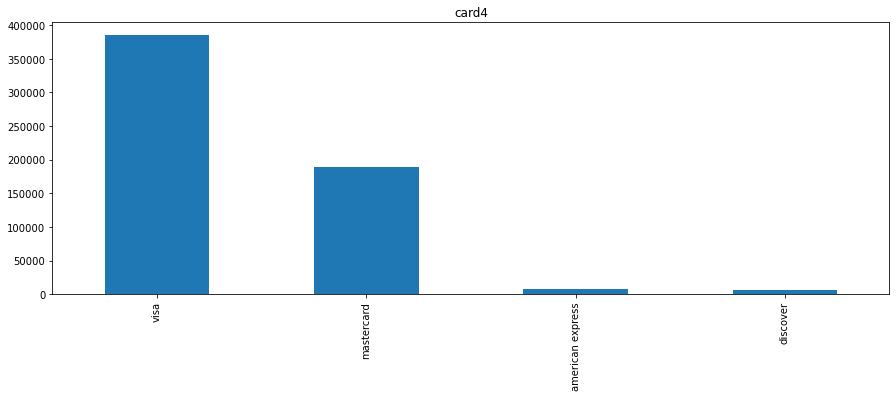

total number of categories in this card5 119 


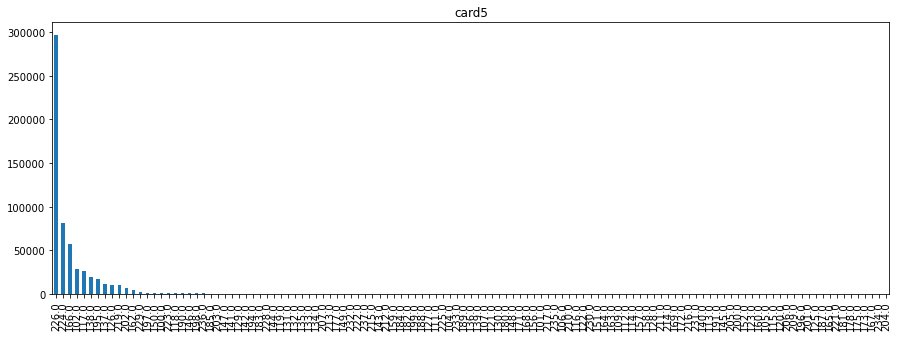

total number of categories in this card6 4 


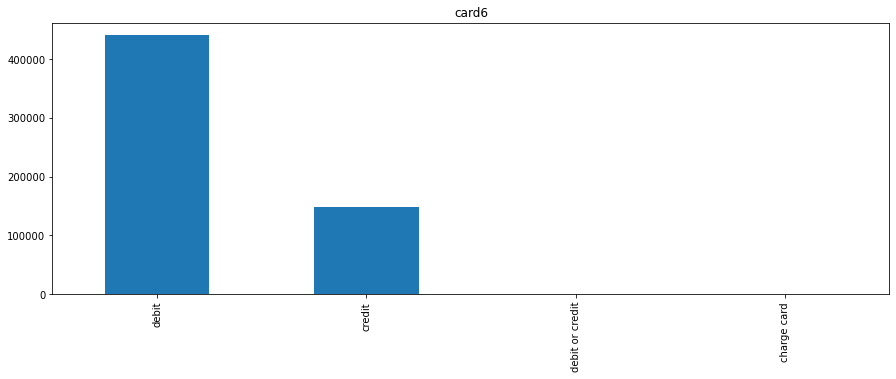

In [38]:
for features in card_features:
    plt.subplots(figsize = (15, 5))
    #train[features]
    print("total number of categories in this {} {} ".format(features,len(train[features].value_counts())))
    train[features].value_counts().plot.bar()
    plt.title(features)
    plt.show()

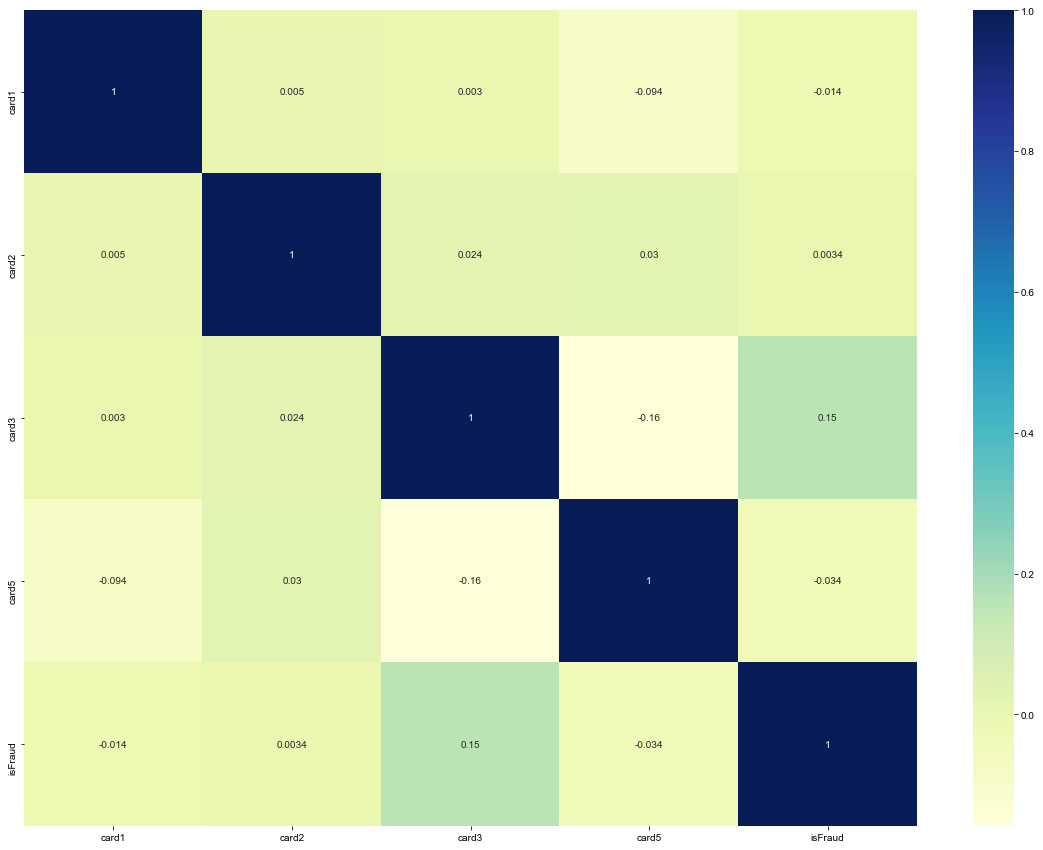

In [39]:
card_features += ['isFraud']
correlation_card = train[card_features].corr()
plt.subplots(figsize = (20, 15))
sns.heatmap(correlation_card,annot=True, cmap = 'YlGnBu') 
sns.set(font_scale=2)

### C features 

In [40]:
c_features = [features for features in train.columns if 'C' in features] 

In [41]:
 c_features.remove('ProductCD')

In [42]:
 c_features

['C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14']

In [43]:
for features in  c_features:

    print("total number of categories in  {} {} ".format(features,len(train[features].value_counts())))

total number of categories in  C1 1657 
total number of categories in  C2 1216 
total number of categories in  C3 27 
total number of categories in  C4 1260 
total number of categories in  C5 319 
total number of categories in  C6 1328 
total number of categories in  C7 1103 
total number of categories in  C8 1253 
total number of categories in  C9 205 
total number of categories in  C10 1231 
total number of categories in  C11 1476 
total number of categories in  C12 1199 
total number of categories in  C13 1597 
total number of categories in  C14 1108 


C3 is negatively corelated with all other features including the target one so we are not taking that feature 

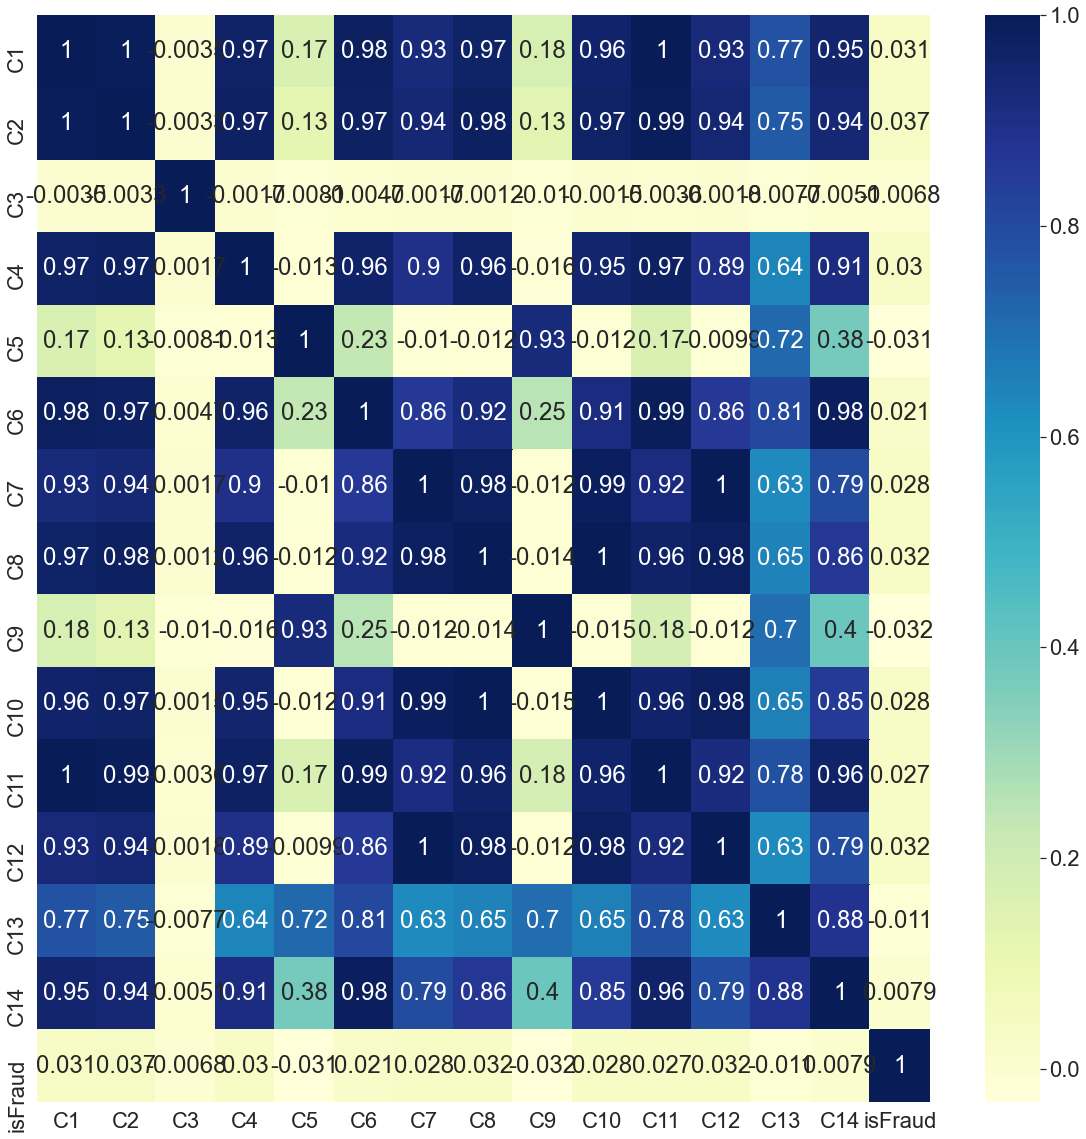

In [44]:
c_features += ['isFraud']
correlation_c = train[c_features].corr()
plt.subplots(figsize = (20, 20))
sns.heatmap(correlation_c,annot=True, cmap = 'YlGnBu') 
sns.set(font_scale=1)

In [45]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [46]:
new_c = correlation(correlation_c, 0.9)

In [49]:
print( "Threse features are highly correlated" + str(new_c))

Threse features are highly correlated{'C6', 'C9', 'C8', 'C10', 'C11', 'C7', 'C14', 'C2', 'C12', 'C4'}


### D features 

In [47]:
D_features = [ 'D1','D2','D3','D4','D5','D6','D7','D8','D9','D10','D11','D12','D13','D14','D15'] 

In [48]:
D_features += ['isFraud']

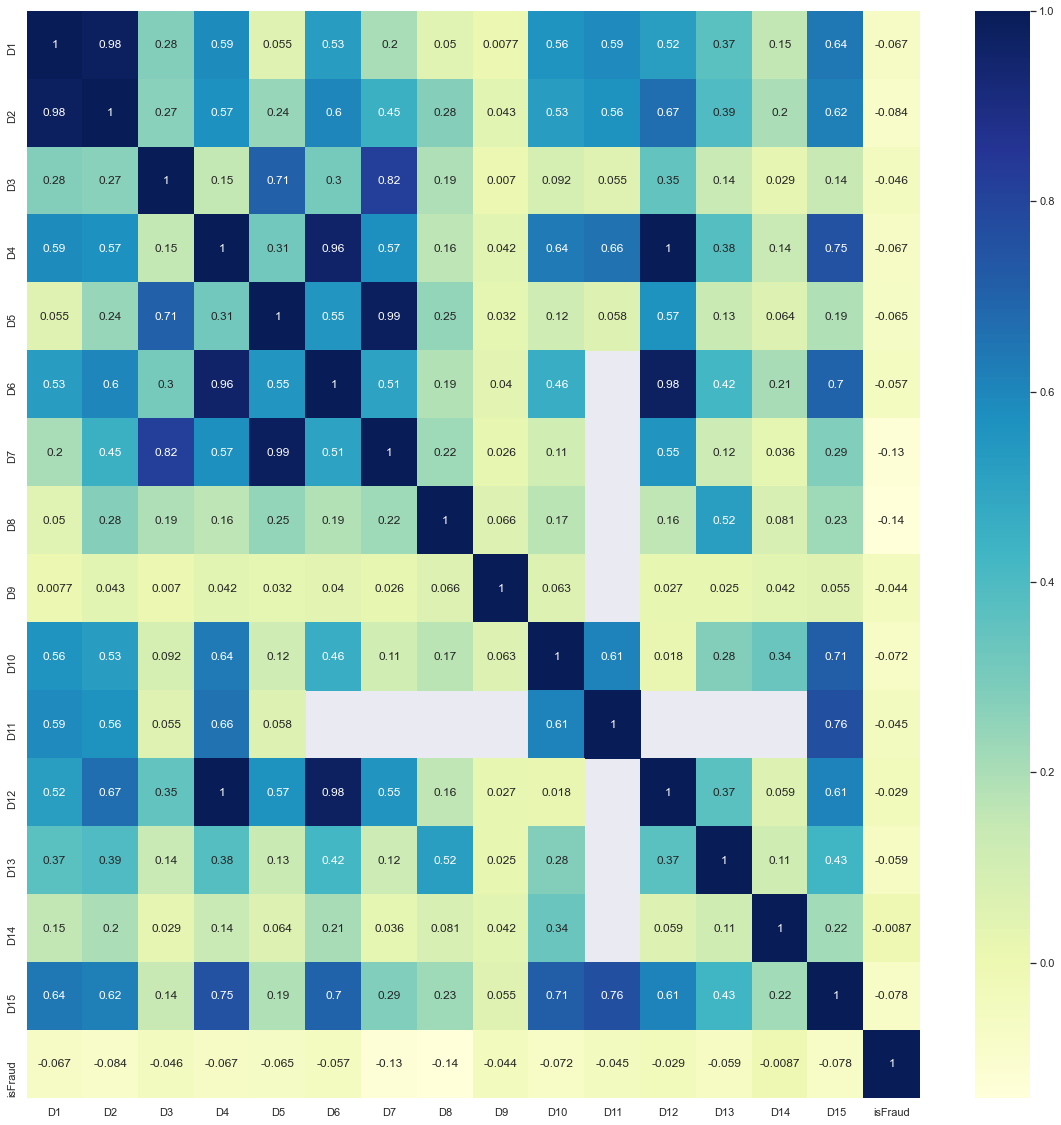

In [50]:
correlation_D = train[D_features].corr()
plt.subplots(figsize = (20, 20))
sns.heatmap(correlation_D,annot=True, cmap = 'YlGnBu') 
sns.set(font_scale=1)

In [51]:
new_D = correlation(correlation_D, 0.9)

In [52]:
print( "Threse features are highly correlated" + str(new_D))

Threse features are highly correlated{'D12', 'D2', 'D15', 'D6', 'D13', 'D7'}


### V features

From the above missing feature percentage we see similar prefix V values have similar missing percentage. so we are taking them as a group 

#### Group 1 - V1 V2 V3 V4 V5 V6 V7 V8 V9 V10 V11 shows 0.4729 % missing value

In [54]:
V1G_features =['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11']

In [55]:
V1G_features += ['isFraud']

In [56]:
correlation_V1G = train[V1G_features].corr()

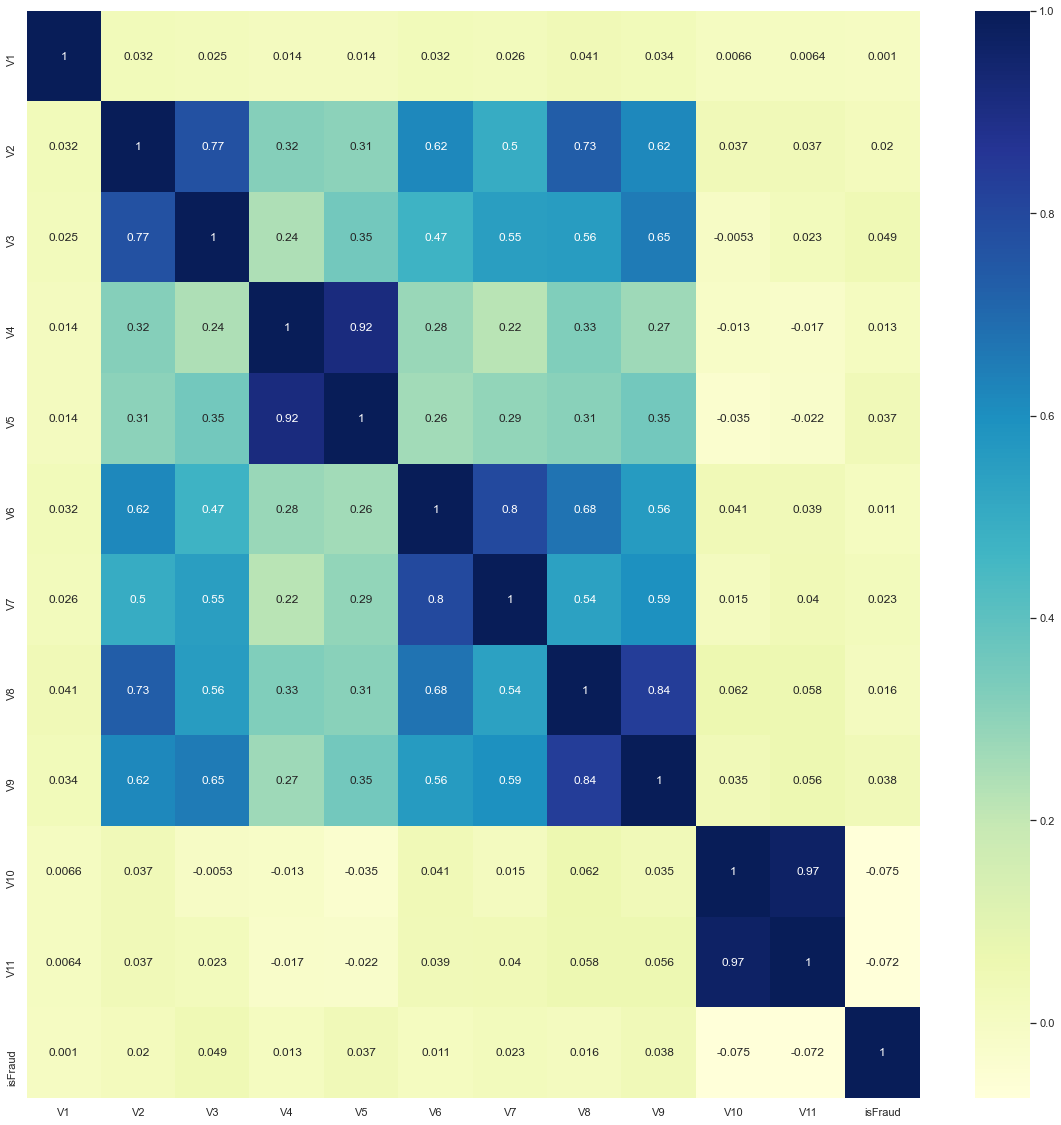

In [57]:
plt.subplots(figsize = (20, 20))
sns.heatmap(correlation_V1G ,annot=True, cmap = 'YlGnBu') 
sns.set(font_scale=1)

In [58]:
new_V1 = correlation(correlation_V1G, 0.9)

In [59]:
print( "Threse features are highly correlated" + str(new_V1))

Threse features are highly correlated{'V7', 'V3', 'V9', 'V11', 'V8', 'V5'}


#### Group 2 V12-V34 0.1288  % missing values

In [60]:
V2G_features =['V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','V29','V30','V31','V32','V33','V34']

In [61]:
V2G_features += ['isFraud']

In [62]:
correlation_V2G = train[V2G_features].corr()

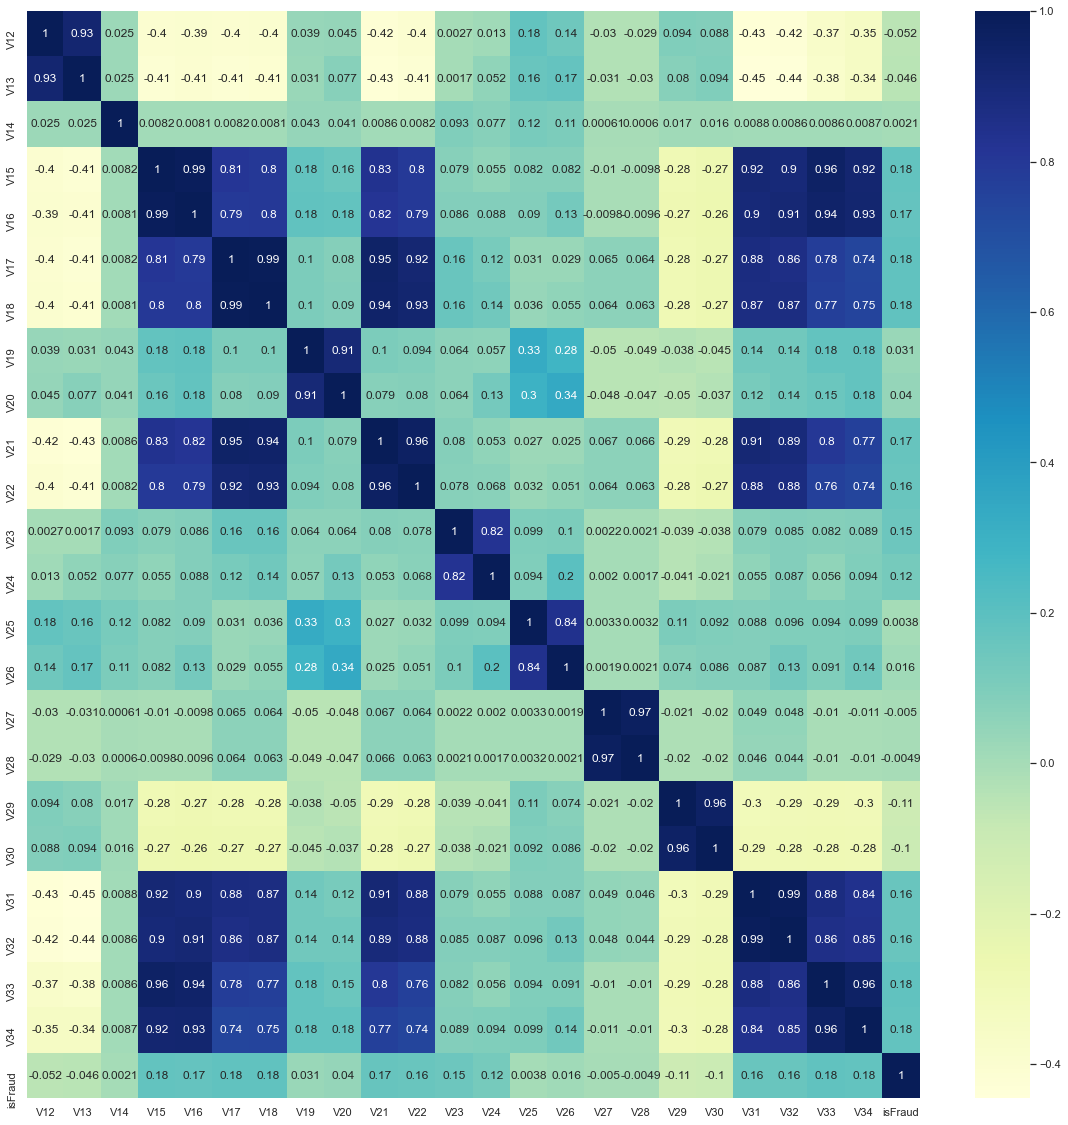

In [63]:
plt.subplots(figsize = (20, 20))
sns.heatmap(correlation_V2G ,annot=True, cmap = 'YlGnBu') 
sns.set(font_scale=1)

In [64]:
new_V2 = correlation(correlation_V2G, 0.9)

In [65]:
print( "Threse features are highly correlated" + str(new_V2))

Threse features are highly correlated{'V31', 'V33', 'V28', 'V16', 'V32', 'V18', 'V17', 'V21', 'V13', 'V24', 'V30', 'V22', 'V26', 'V20', 'V34'}


#### Group3 V35 - V52 0.2861  % missing values

In [66]:
V3G = ['V35','V36','V37','V38','V39','V40','V41','V42','V43','V44','V45','V46','V47','V48','V49','V50','V51','V52']

In [67]:
V3G += ['isFraud']

In [68]:
correlation_V3G = train[V3G].corr()

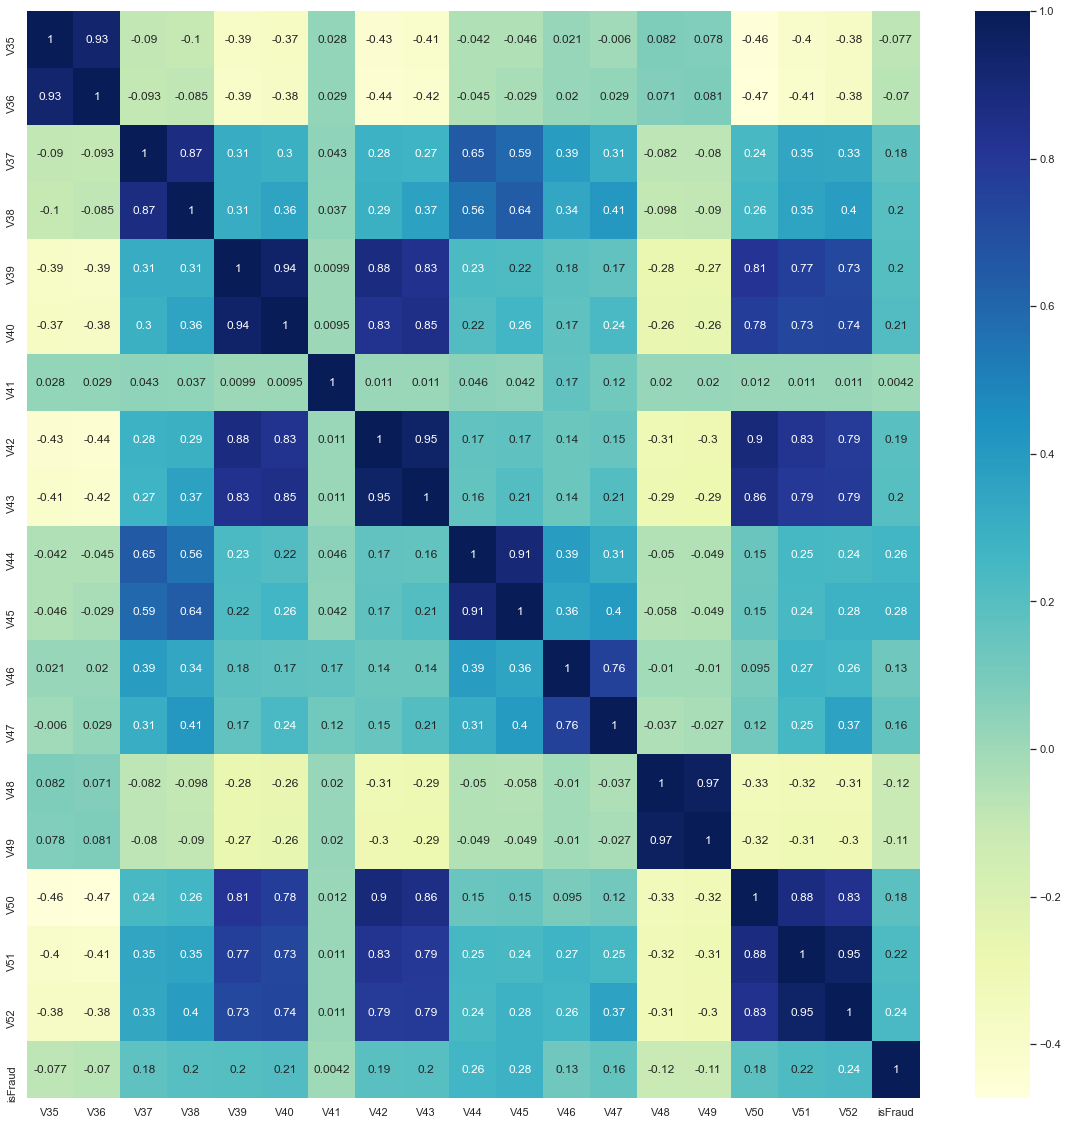

In [69]:
correlation_V3G = train[V3G].corr()
plt.subplots(figsize = (20, 20))
sns.heatmap(correlation_V3G ,annot=True, cmap = 'YlGnBu') 
sns.set(font_scale=1)

In [70]:
new_V3 = correlation(correlation_V3G, 0.8)

In [71]:
print( "Threse features are highly correlated" + str(new_V3))

Threse features are highly correlated{'V36', 'V43', 'V52', 'V45', 'V49', 'V51', 'V50', 'V47', 'V44', 'V39', 'V42', 'V40', 'V38'}


#### Group 4 V53 - V74 0.1306  % missing values

In [72]:
V4G = ['V53','V54','V55','V56','V57','V58','V59','V60','V61','V62','V63','V64','V65','V66','V67','V68','V69','V70','V71','V72','V73','V74']

In [73]:
V4G += ['isFraud']

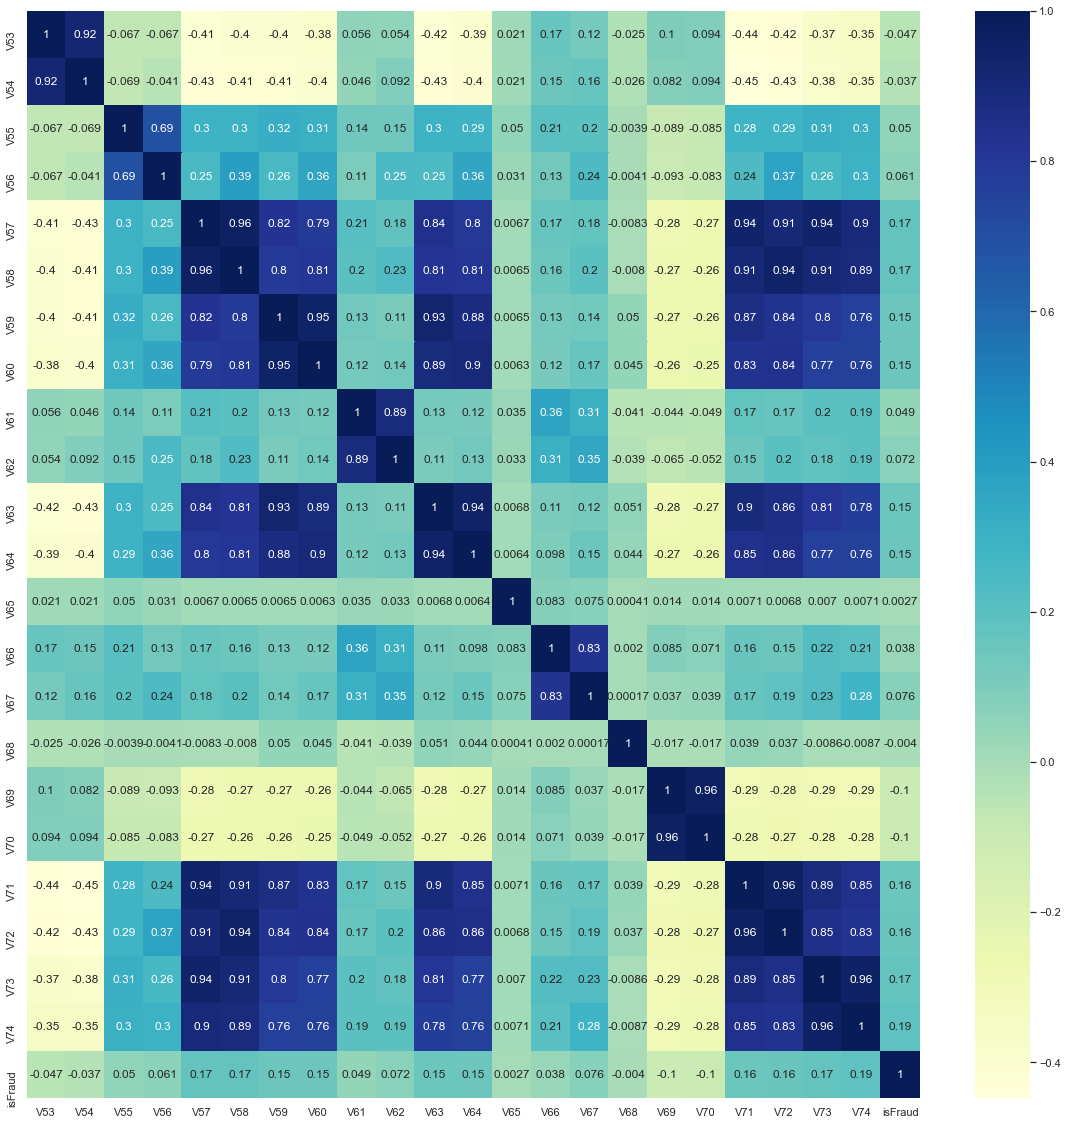

In [74]:
correlation_V4G = train[V4G].corr()
plt.subplots(figsize = (20, 20))
sns.heatmap(correlation_V4G ,annot=True, cmap = 'YlGnBu') 
sns.set(font_scale=1)

In [75]:
new_V4 = correlation(correlation_V4G, 0.8)

In [76]:
print( "Threse features are highly correlated" + str(new_V4))

Threse features are highly correlated{'V64', 'V58', 'V63', 'V72', 'V73', 'V54', 'V71', 'V74', 'V70', 'V59', 'V56', 'V62', 'V67', 'V57', 'V60'}


#### Group 5 V75 -V94 0.151  % missing values

In [77]:
V5G = ['V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94']

In [78]:
V5G += ['isFraud']

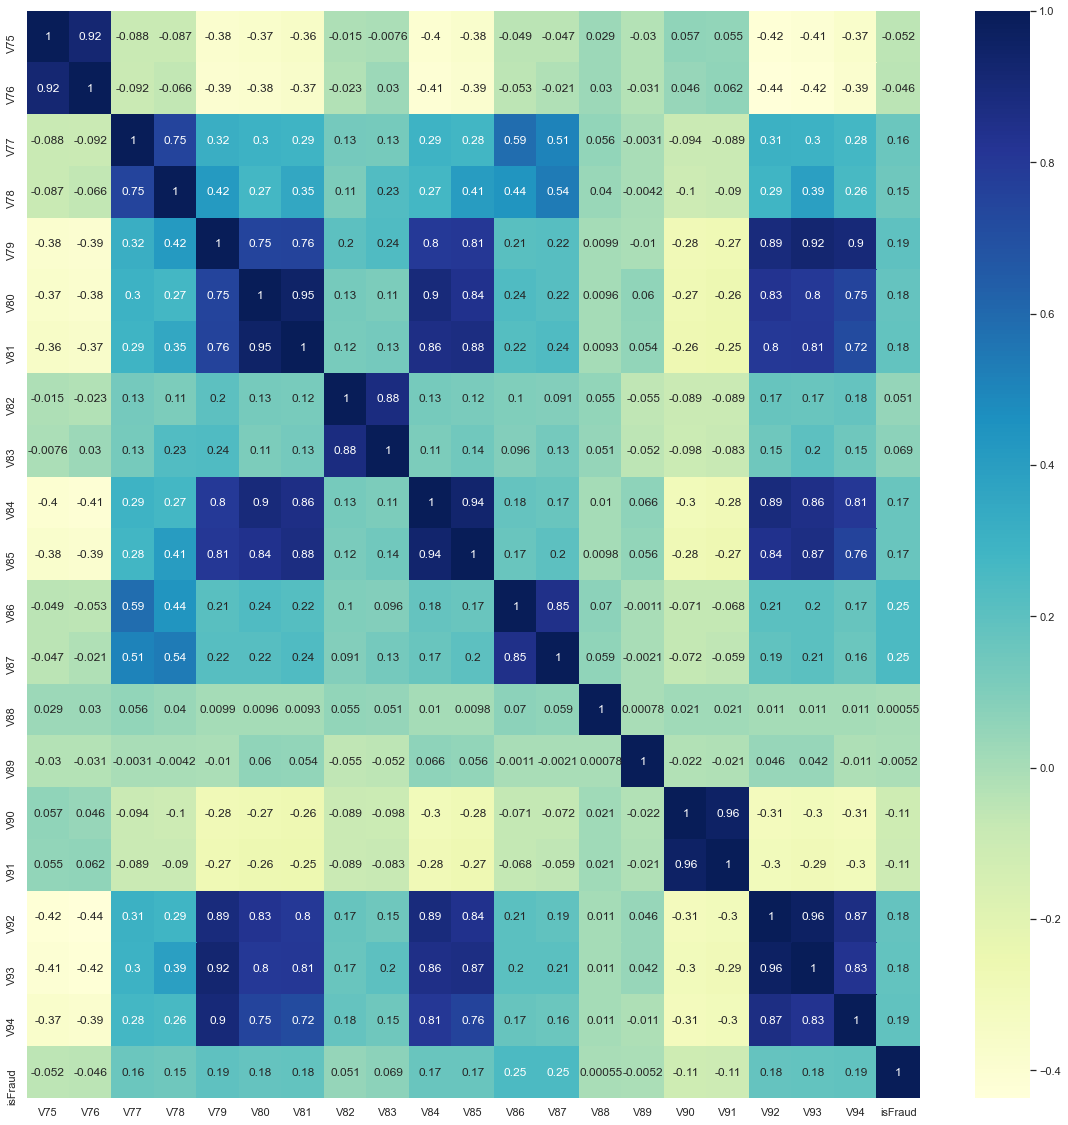

In [79]:
correlation_V5G = train[V5G].corr()
plt.subplots(figsize = (20, 20))
sns.heatmap(correlation_V5G ,annot=True, cmap = 'YlGnBu') 
sns.set(font_scale=1)

In [80]:
new_V5 = correlation(correlation_V5G, 0.8)

In [81]:
print( "Threse features are highly correlated" + str(new_V5))

Threse features are highly correlated{'V83', 'V85', 'V94', 'V84', 'V91', 'V81', 'V76', 'V80', 'V79', 'V86', 'V92', 'V78', 'V93', 'V87'}


#### Group 6 V95 -V137 

In [82]:
V6G = ['V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137']

In [83]:
V6G += ['isFraud']

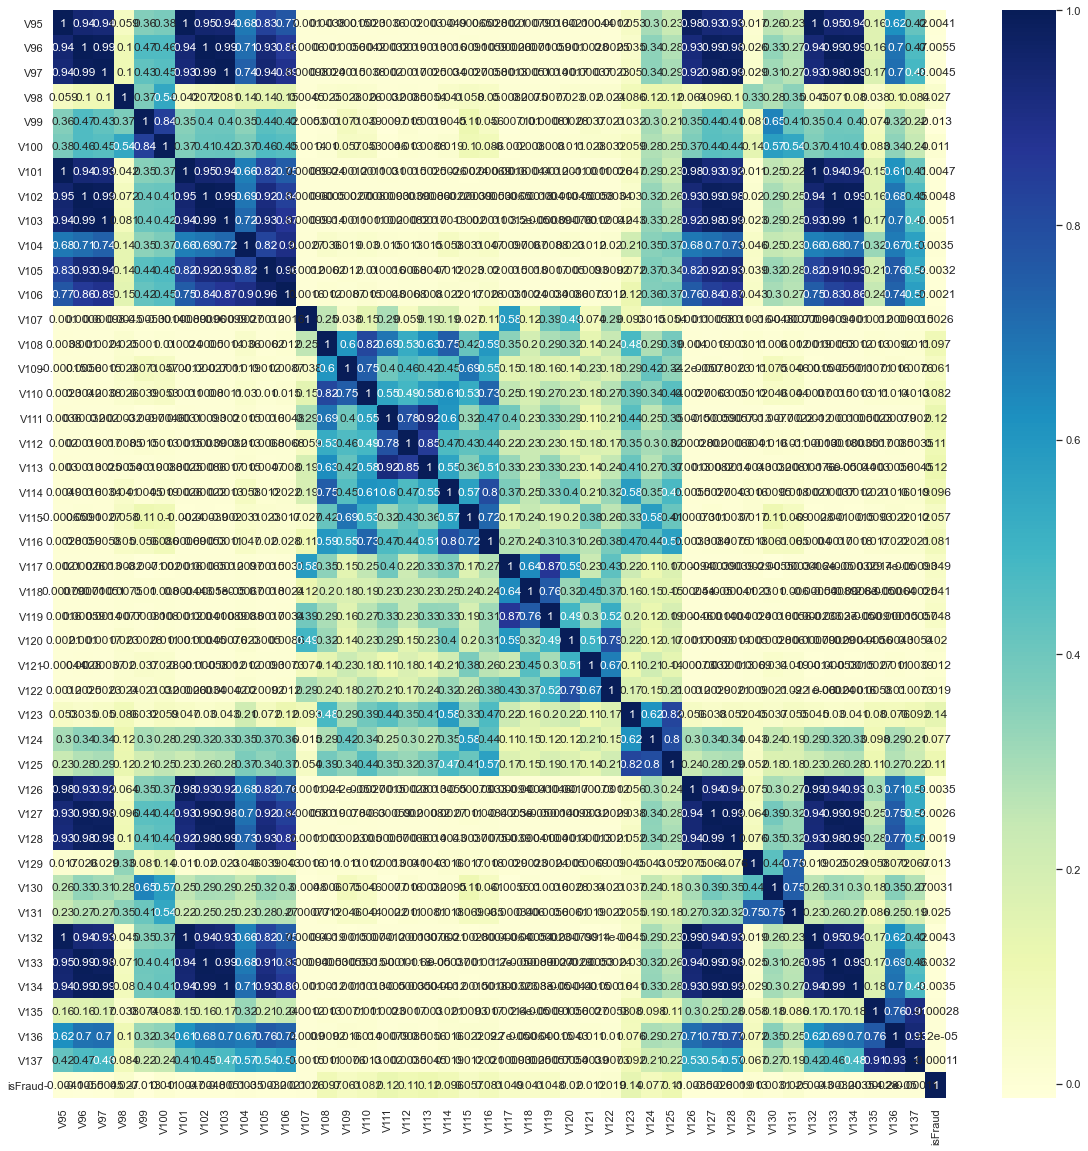

In [84]:
correlation_V6G = train[V6G].corr()
plt.subplots(figsize = (20, 20))
sns.heatmap(correlation_V6G ,annot=True, cmap = 'YlGnBu') 
sns.set(font_scale=1)

In [87]:
new_V6 = correlation(correlation_V6G, 0.8)

In [88]:
print( "Threse features are highly correlated" + str(new_V6))

Threse features are highly correlated{'V118', 'V120', 'V130', 'V111', 'V100', 'V136', 'V115', 'V125', 'V104', 'V96', 'V117', 'V119', 'V126', 'V106', 'V113', 'V101', 'V116', 'V131', 'V123', 'V133', 'V132', 'V110', 'V105', 'V109', 'V127', 'V114', 'V134', 'V137', 'V122', 'V102', 'V128', 'V112', 'V103', 'V97'}


#### Group 7 V95 -V137 

In [89]:
V7G=['V138', 'V139', 'V140', 'V141', 'V142', 'V146', 'V147', 'V148', 'V149', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158', 'V161', 'V162', 'V163']

In [90]:
V7G += ['isFraud']

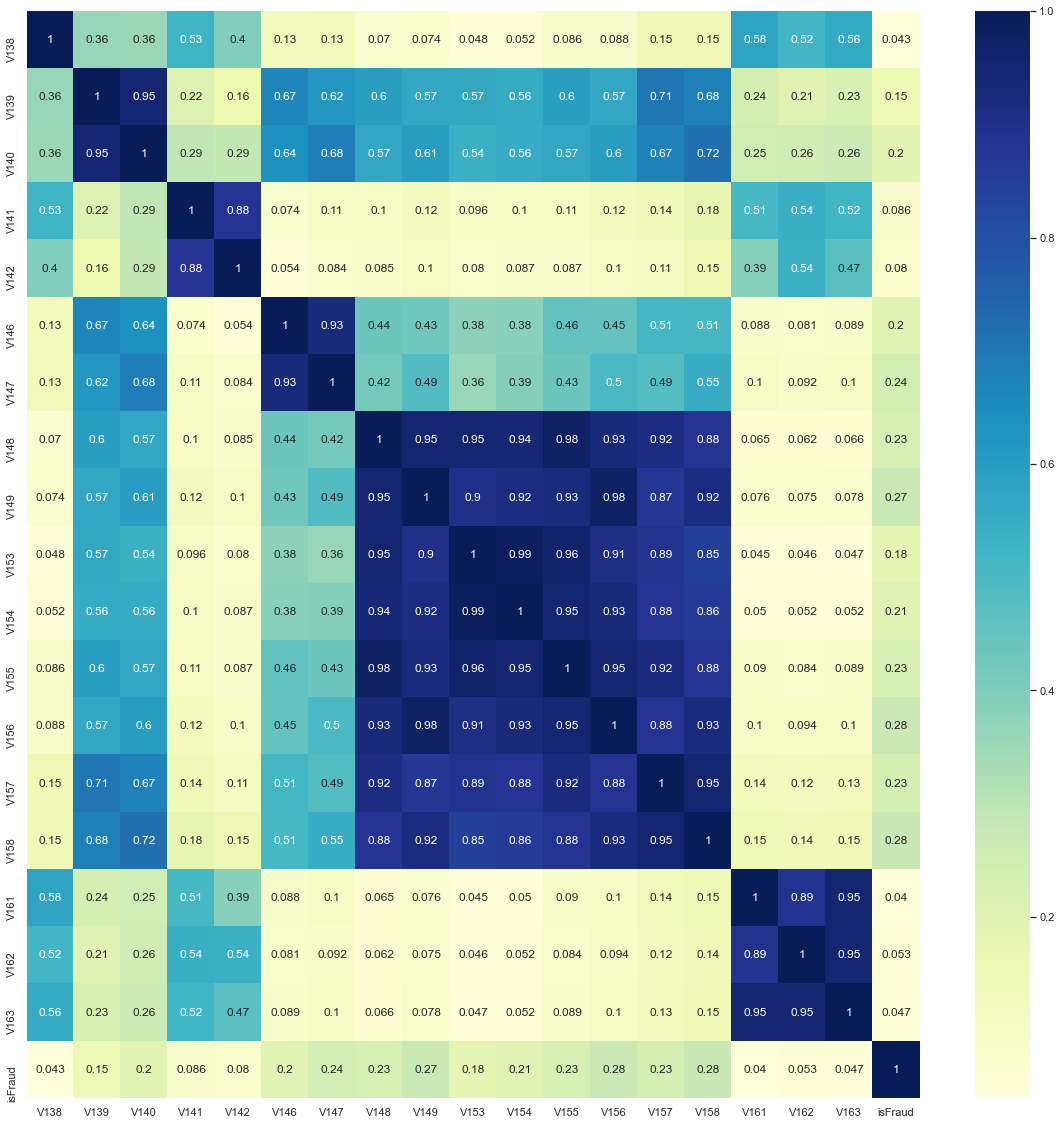

In [91]:
correlation_V7G = train[V7G].corr()
plt.subplots(figsize = (20, 20))
sns.heatmap(correlation_V7G ,annot=True, cmap = 'YlGnBu') 
sns.set(font_scale=1)

In [92]:
new_V7 = correlation(correlation_V7G, 0.8)

In [93]:
print( "Threse features are highly correlated" + str(new_V7))

Threse features are highly correlated{'V154', 'V147', 'V163', 'V149', 'V142', 'V153', 'V158', 'V156', 'V161', 'V140', 'V157', 'V162', 'V155'}


#### Group 8 V143 - 166 

In [94]:
V8G = ['V143', 'V144', 'V145', 'V150', 'V151', 'V152', 'V159', 'V160', 'V164', 'V165', 'V166']

In [95]:
V8G += ['isFraud']

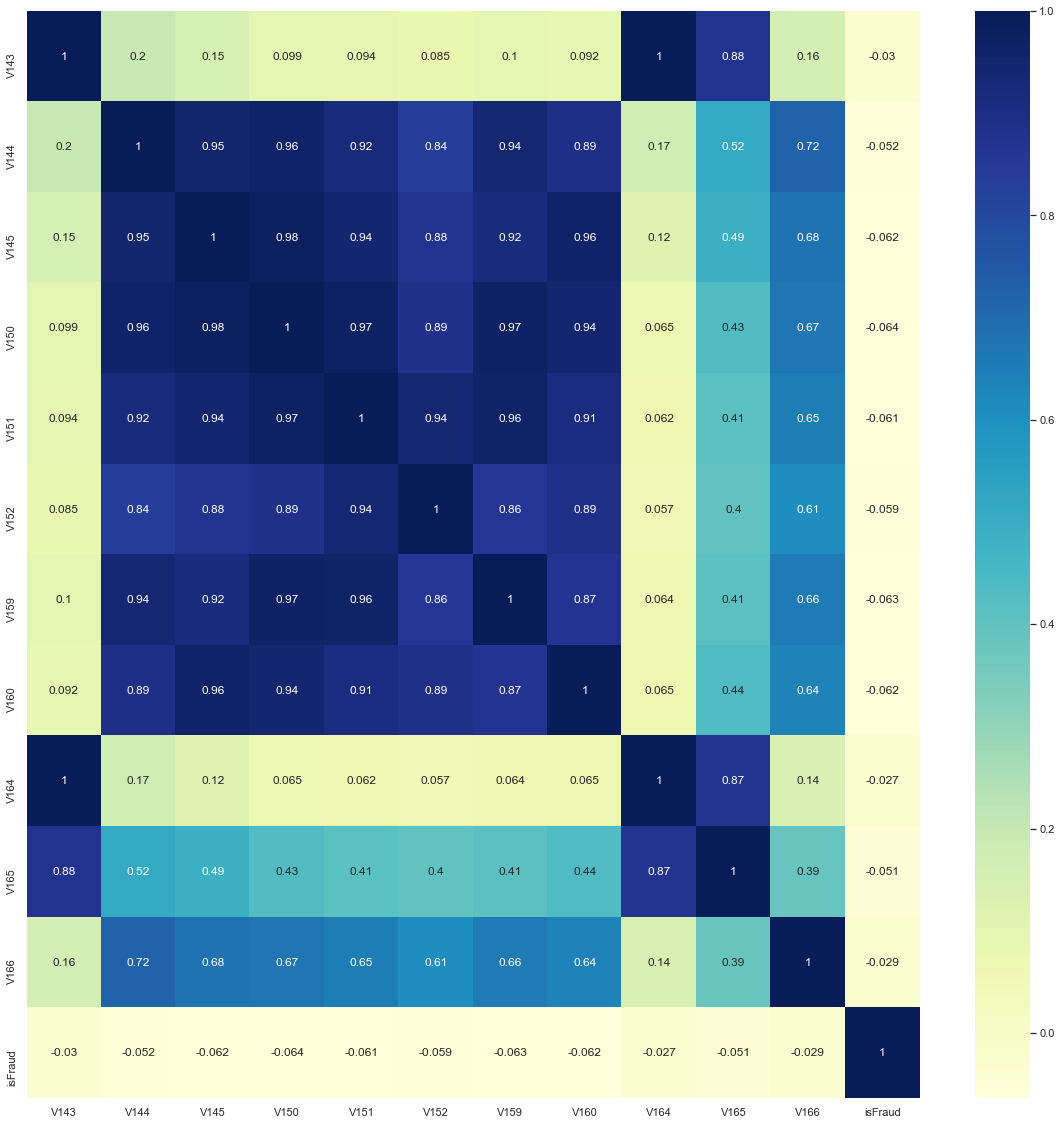

In [96]:
correlation_V8G = train[V8G].corr()
plt.subplots(figsize = (20, 20))
sns.heatmap(correlation_V8G ,annot=True, cmap = 'YlGnBu') 
sns.set(font_scale=1)

In [97]:
new_V8 = correlation(correlation_V8G, 0.8)

In [98]:
print( "Threse features are highly correlated" + str(new_V8))

Threse features are highly correlated{'V151', 'V166', 'V152', 'V145', 'V164', 'V159', 'V150', 'V165', 'V160'}


#### Group 9 V167 - V216

In [99]:
V9G = ['V167', 'V168', 'V172', 'V173', 'V176', 'V177', 'V178', 'V179', 'V181', 'V182', 'V183', 'V186', 'V187', 'V190', 'V191', 'V192', 'V193', 'V196', 'V199', 'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V211', 'V212', 'V213', 'V214', 'V215', 'V216']

In [100]:
V9G += ['isFraud']

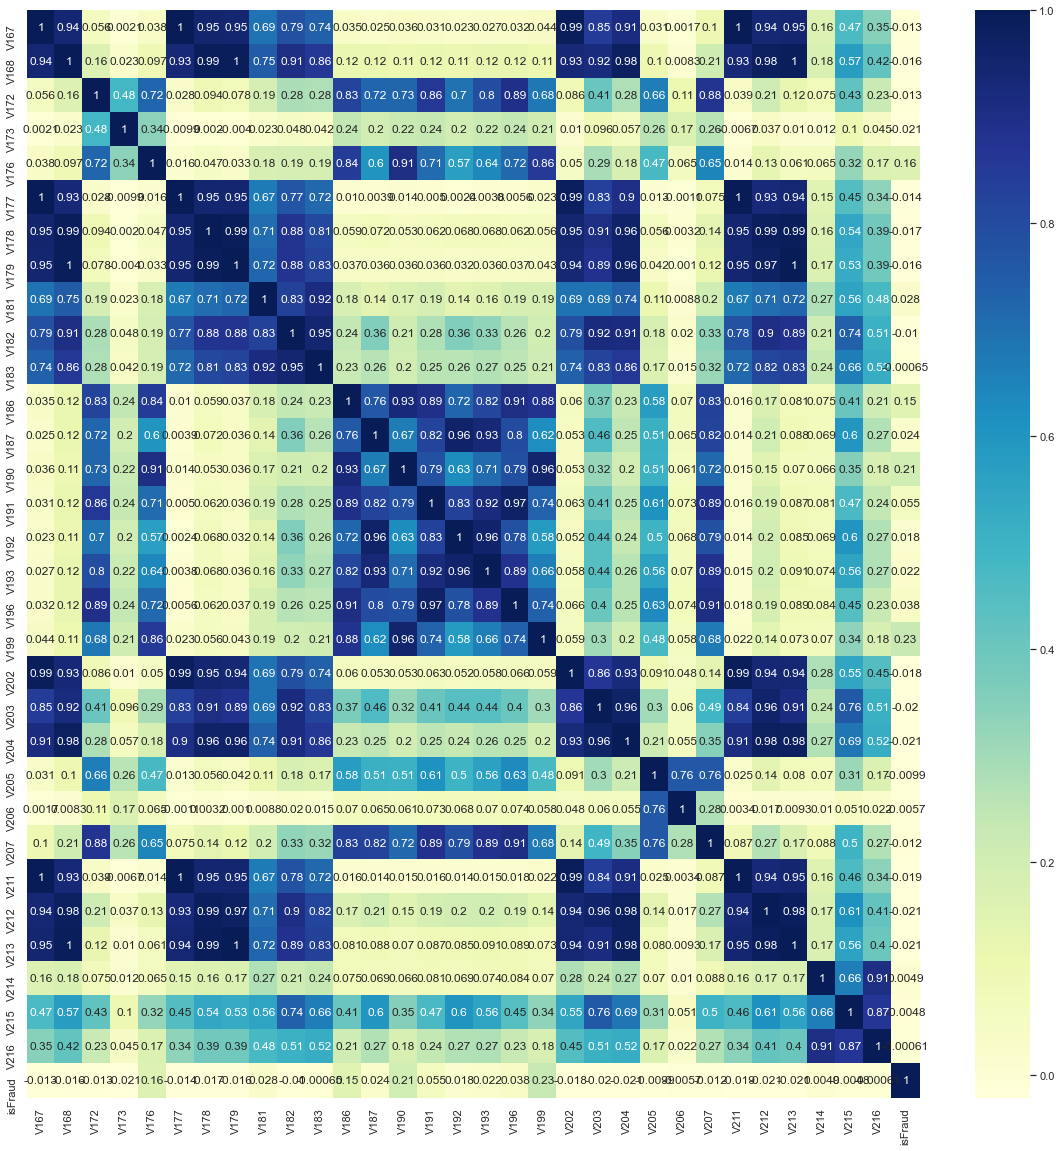

In [101]:
correlation_V9G = train[V9G].corr()
plt.subplots(figsize = (20, 20))
sns.heatmap(correlation_V9G ,annot=True, cmap = 'YlGnBu') 
sns.set(font_scale=1)

In [102]:
new_V9 = correlation(correlation_V9G, 0.8)

In [103]:
print( "Threse features are highly correlated" + str(new_V9))

Threse features are highly correlated{'V179', 'V186', 'V182', 'V204', 'V176', 'V168', 'V192', 'V181', 'V211', 'V199', 'V190', 'V187', 'V178', 'V212', 'V207', 'V203', 'V202', 'V177', 'V183', 'V191', 'V213', 'V193', 'V196', 'V205', 'V216'}


#### Group 10 

In [104]:
V10G= ['V217', 'V218', 'V219', 'V223', 'V224', 'V225', 'V226', 'V228', 'V229', 'V230', 'V231', 'V232', 'V233', 'V235', 'V236', 'V237', 'V240', 'V241', 'V242', 'V243', 'V244', 'V246', 'V247', 'V248', 'V249', 'V252', 'V253', 'V254', 'V257', 'V258', 'V260', 'V261', 'V262', 'V263', 'V264', 'V265', 'V266', 'V267', 'V268', 'V269', 'V273', 'V274', 'V275', 'V276', 'V277', 'V278']

In [105]:
V10G += ['isFraud']

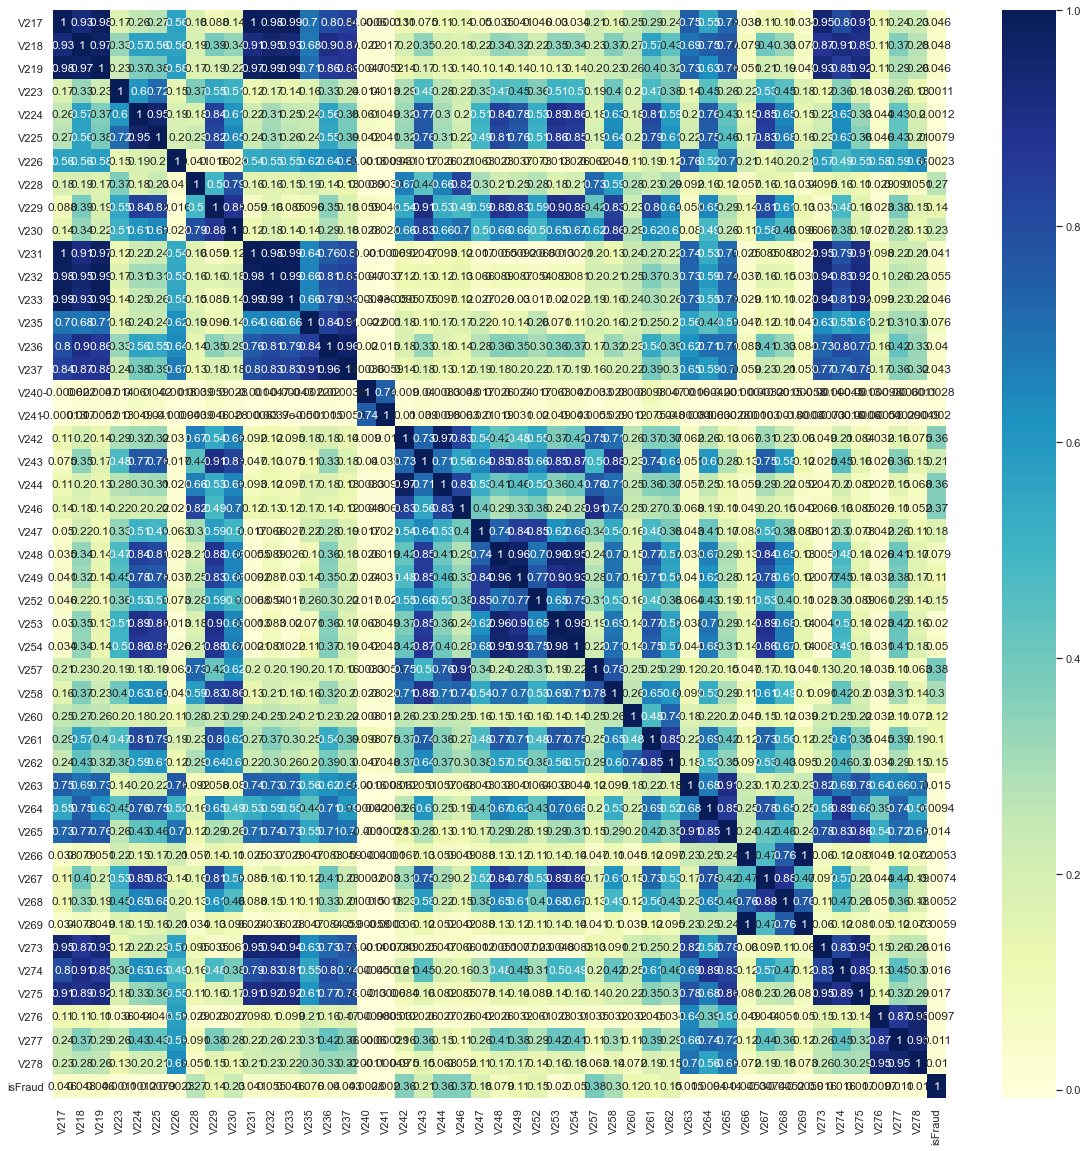

In [106]:
correlation_V10G = train[V10G].corr()
plt.subplots(figsize = (20, 20))
sns.heatmap(correlation_V10G ,annot=True, cmap = 'YlGnBu') 
sns.set(font_scale=1)

In [107]:
new_V10 = correlation(correlation_V10G, 0.8)

In [108]:
print( "Threse features are highly correlated" + str(new_V10))

Threse features are highly correlated{'V233', 'V225', 'V235', 'V268', 'V229', 'V236', 'V231', 'V262', 'V249', 'V254', 'V230', 'V219', 'V248', 'V241', 'V258', 'V232', 'V273', 'V274', 'V269', 'V263', 'V244', 'V275', 'V278', 'V224', 'V265', 'V218', 'V277', 'V247', 'V246', 'V243', 'V267', 'V257', 'V242', 'V252', 'V237', 'V261', 'V253'}


#### Group 11

In [109]:
V11G = ['V220', 'V221', 'V222', 'V227', 'V234', 'V238', 'V239', 'V245', 'V250', 'V251', 'V255', 'V256', 'V259', 'V270', 'V271', 'V272']

In [110]:
V11G += ['isFraud']

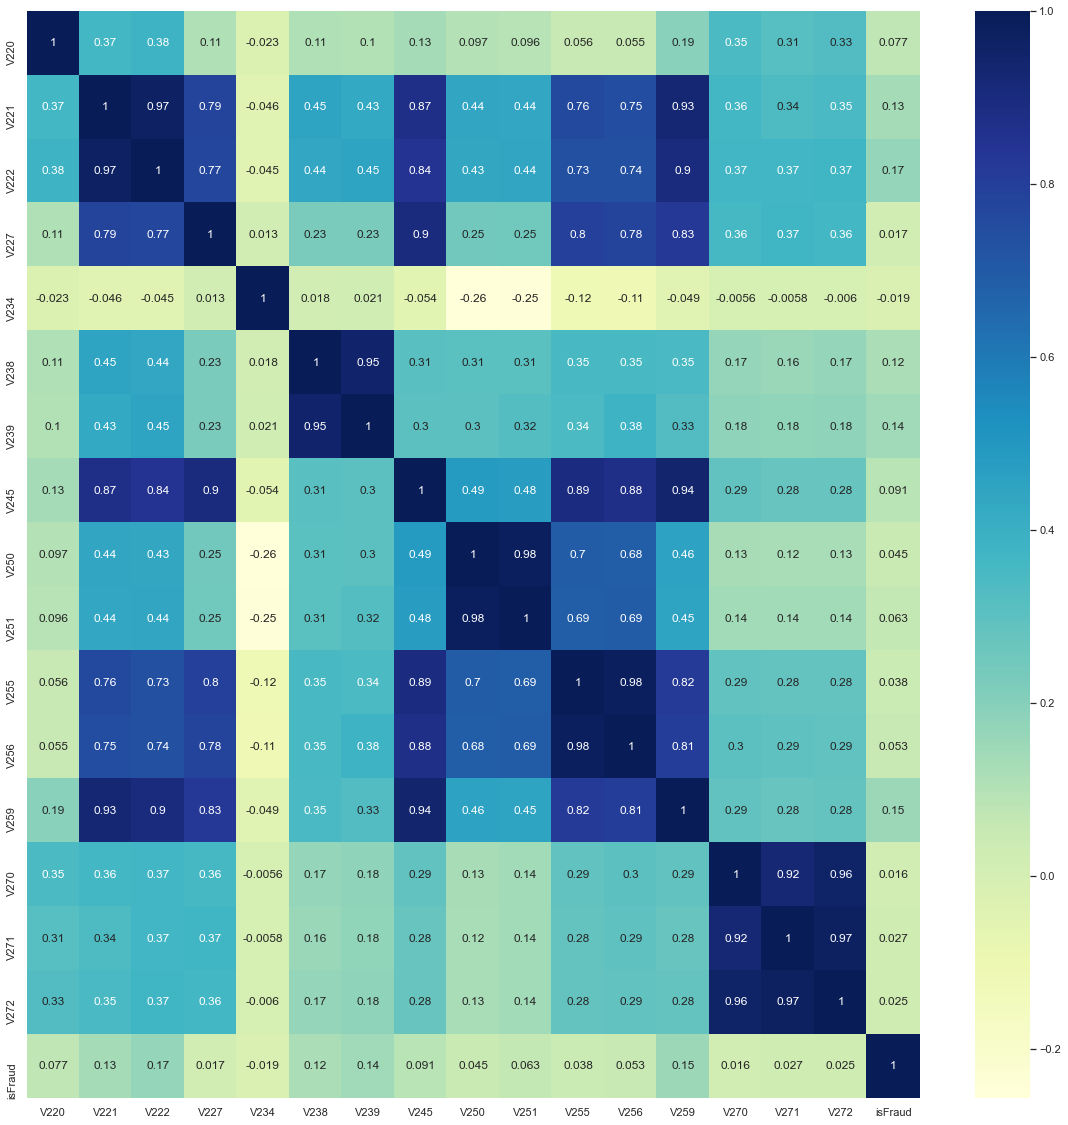

In [111]:
correlation_V11G = train[V11G].corr()
plt.subplots(figsize = (20, 20))
sns.heatmap(correlation_V11G ,annot=True, cmap = 'YlGnBu') 
sns.set(font_scale=1)

In [112]:
new_V11 = correlation(correlation_V11G, 0.8)

In [113]:
print( "Threse features are highly correlated" + str(new_V11))

Threse features are highly correlated{'V227', 'V271', 'V255', 'V256', 'V222', 'V239', 'V259', 'V251', 'V245', 'V272'}


#### Group 12 

In [114]:
V12G = ['V279', 'V280', 'V284', 'V285', 'V286', 'V287', 'V290', 'V291', 'V292', 'V293', 'V294', 'V295', 'V297', 'V298', 'V299', 'V302', 'V303', 'V304', 'V305', 'V306', 'V307', 'V308', 'V309', 'V310', 'V311', 'V312', 'V316', 'V317', 'V318', 'V319', 'V320', 'V321']

In [115]:
V12G += ['isFraud']

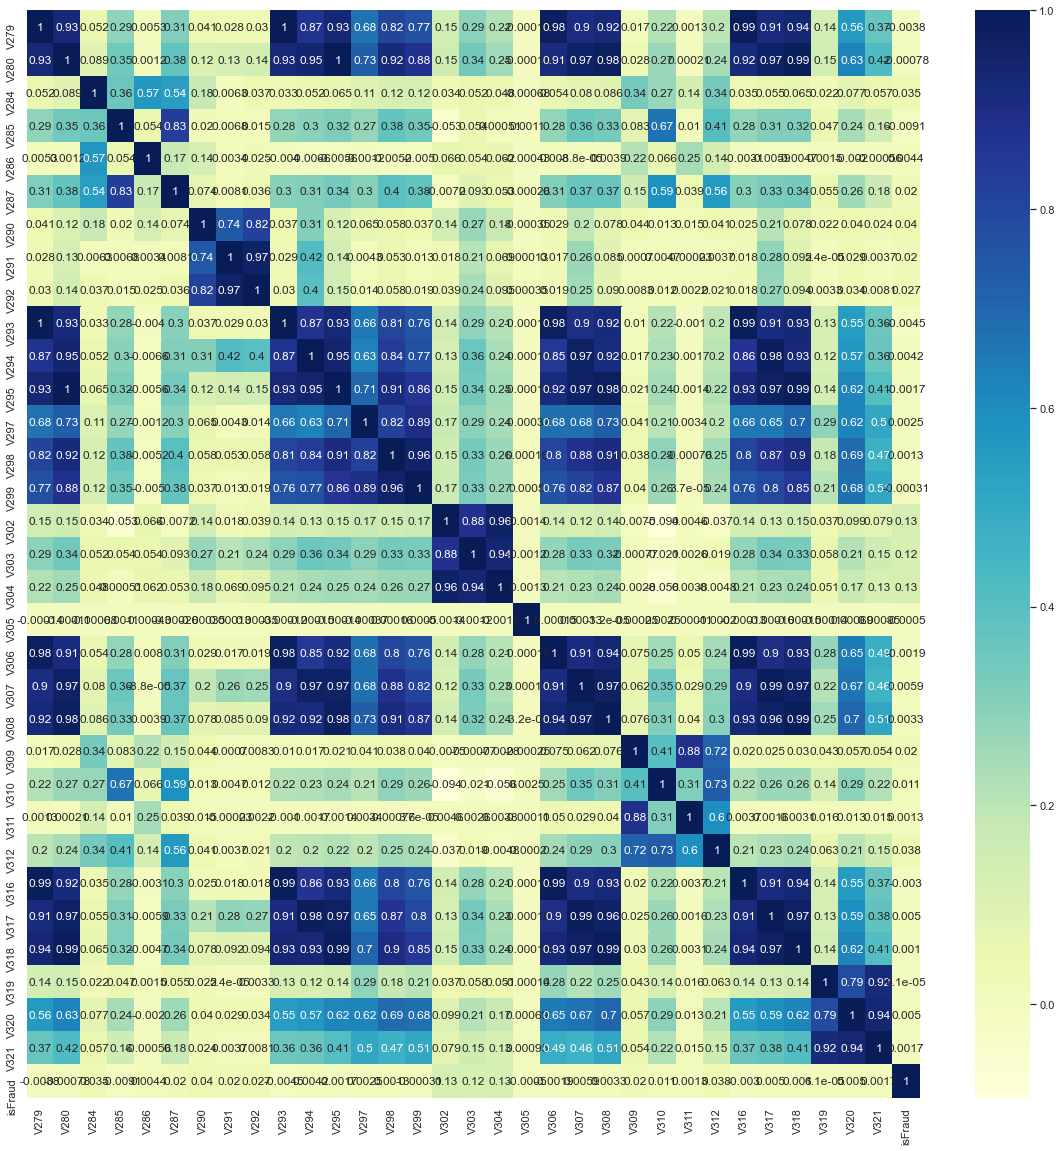

In [116]:
correlation_V12G = train[V12G].corr()
plt.subplots(figsize = (20, 20))
sns.heatmap(correlation_V12G ,annot=True, cmap = 'YlGnBu') 
sns.set(font_scale=1)

In [117]:
new_V12 = correlation(correlation_V12G, 0.8)

In [118]:
print( "Threse features are highly correlated" + str(new_V12))

Threse features are highly correlated{'V316', 'V318', 'V308', 'V310', 'V320', 'V299', 'V312', 'V303', 'V293', 'V304', 'V298', 'V306', 'V307', 'V291', 'V321', 'V294', 'V317', 'V297', 'V295', 'V280', 'V292', 'V311', 'V287'}


#### Group 13

In [119]:
V13G = ['V322', 'V323', 'V324', 'V325', 'V326', 'V327', 'V328', 'V329', 'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338', 'V339']

In [120]:
V13G += ['isFraud']

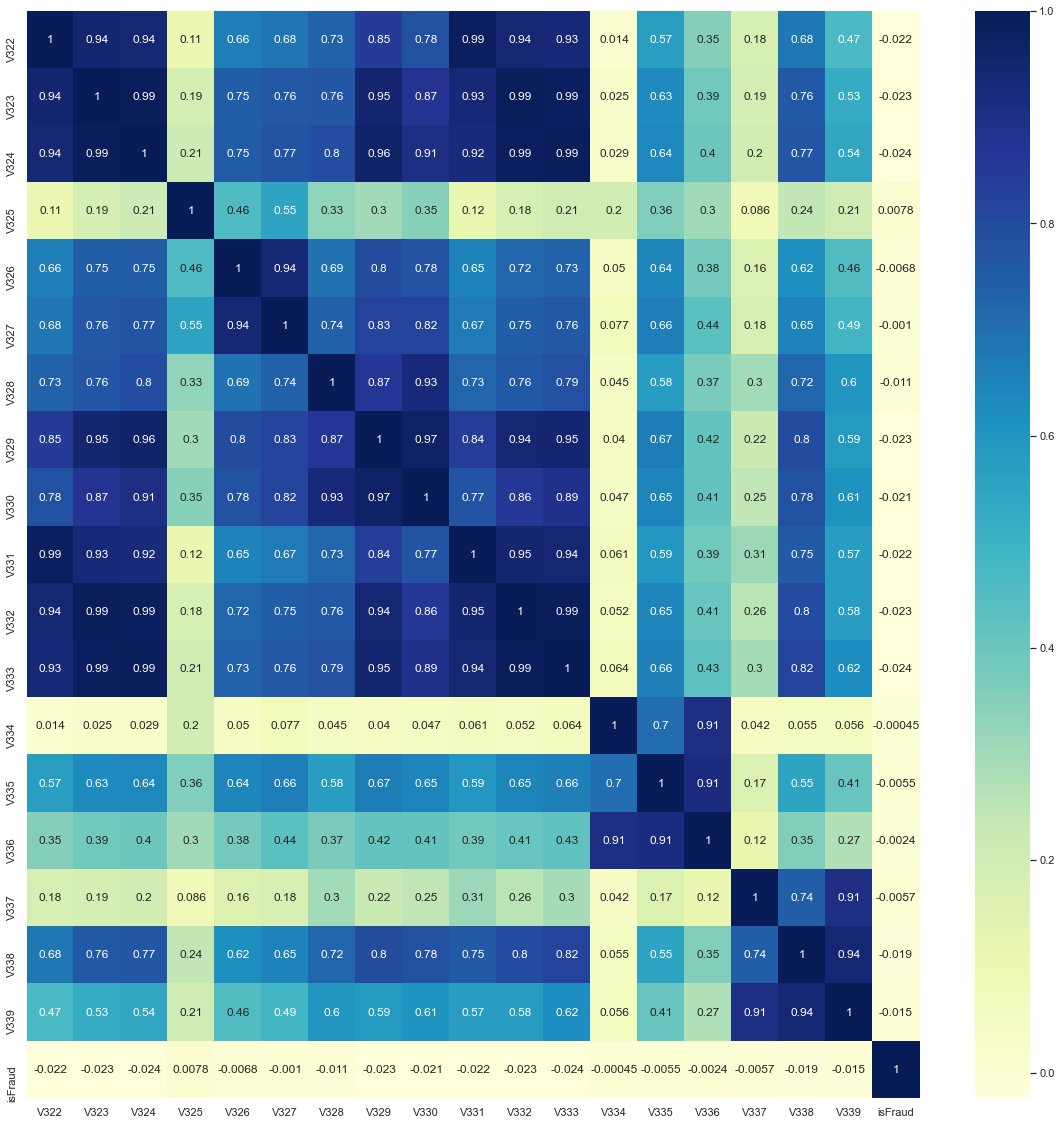

In [121]:
correlation_V13G = train[V13G].corr()
plt.subplots(figsize = (20, 20))
sns.heatmap(correlation_V13G ,annot=True, cmap = 'YlGnBu') 
sns.set(font_scale=1)

In [122]:
new_V13 = correlation(correlation_V13G, 0.8)

In [123]:
print( "Threse features are highly correlated" + str(new_V13))

Threse features are highly correlated{'V339', 'V326', 'V324', 'V329', 'V336', 'V323', 'V332', 'V330', 'V331', 'V328', 'V327', 'V333', 'V338'}


### ID features

some of the ID features have more than 99 % missing value 

In [124]:
id_features =[features for features in train.columns if 'id_' in features]

In [125]:
id_features += ['isFraud']

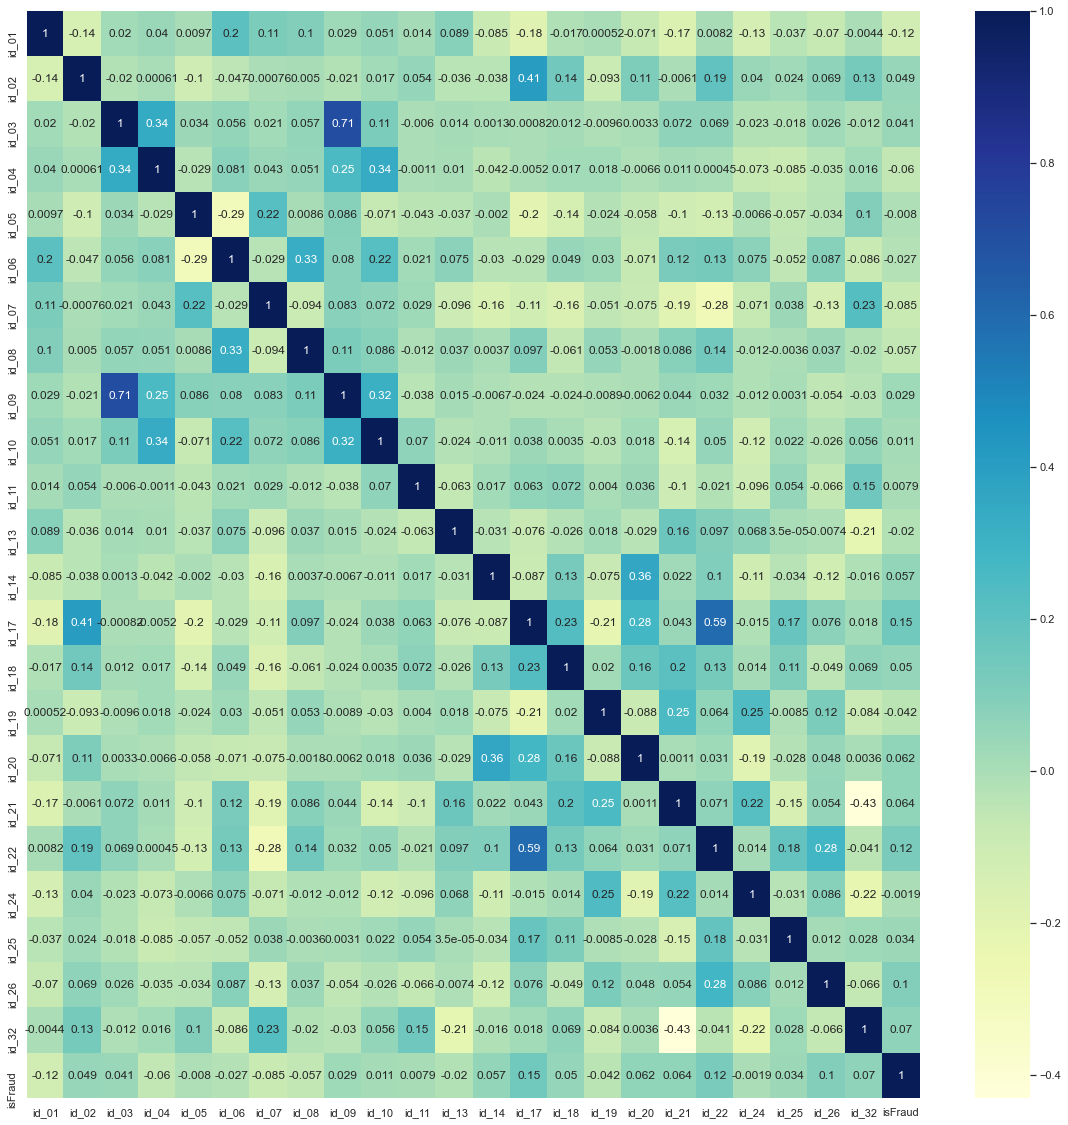

In [126]:
correlation_id = train[id_features].corr()
plt.subplots(figsize = (20, 20))
sns.heatmap(correlation_id,annot=True, cmap = 'YlGnBu') 
sns.set(font_scale=1)

In [127]:
new_id = correlation(correlation_id, 0.9)

In [128]:
print( "Threse features are highly correlated" + str(new_id))

Threse features are highly correlated{'id_09'}


### Device feature

In [129]:
Device_features =[features for features in train.columns if 'Device' in features]

In [130]:
for f in Device_features:
    print(feature)
    print(train[f].value_counts())

DeviceInfo
desktop    85165
mobile     55645
Name: DeviceType, dtype: int64
DeviceInfo
Windows                                        47722
iOS Device                                     19782
MacOS                                          12573
Trident/7.0                                     7440
rv:11.0                                         1901
rv:57.0                                          962
SM-J700M Build/MMB29K                            549
SM-G610M Build/MMB29K                            461
SM-G531H Build/LMY48B                            410
rv:59.0                                          362
SM-G935F Build/NRD90M                            334
SM-G955U Build/NRD90M                            328
SM-G532M Build/MMB29T                            316
ALE-L23 Build/HuaweiALE-L23                      312
SM-G950U Build/NRD90M                            290
SM-G930V Build/NRD90M                            274
rv:58.0                                          269
rv:52.0     

# email_features

In [131]:
email_features =[features for features in train.columns if 'emaildomain' in features]

In [132]:
for f in email_features:
    print(feature)
    print(train[f].value_counts())

DeviceInfo
gmail.com           228355
yahoo.com           100934
hotmail.com          45250
anonymous.com        36998
aol.com              28289
comcast.net           7888
icloud.com            6267
outlook.com           5096
msn.com               4092
att.net               4033
live.com              3041
sbcglobal.net         2970
verizon.net           2705
ymail.com             2396
bellsouth.net         1909
yahoo.com.mx          1543
me.com                1522
cox.net               1393
optonline.net         1011
charter.net            816
live.com.mx            749
rocketmail.com         664
mail.com               559
earthlink.net          514
gmail                  496
outlook.es             438
mac.com                436
juno.com               322
aim.com                315
hotmail.es             305
roadrunner.com         305
windstream.net         305
hotmail.fr             295
frontier.com           280
embarqmail.com         260
web.de                 240
twc.com          